In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
a = 1
print(a)

b = 3

a + b
print(a+b)

# a = 'Taegeun'
# print(a)

# b = ' Song'
# print(a+b)

# a = 3

# a + b
# print(a+b)


1
4


In [9]:

a = [1,2,3,4,5]


# for aa in (a):
#     print(aa)

# for ia, aa in enumerate(a):
#     print(ia, aa)

print(a+3)

TypeError: ignored

In [20]:
##
a = [1,2,3]
b = [10,20,30]

##
# a + b
# print(a*3)

##
c = []
for a1, b1 in zip(a,b):
    # print(a1,b1)
    c.append(a1 + b1)
print(c)

c = []
for ia, a1 in enumerate(a):
    for ib, b1 in enumerate(b):
        # print(ia, a1, 'a')
        # print(ib, b1, 'b')
        if ia == ib:
            c.append(a1+b1)
print(c)
        

# ##
[a1 + b1 for a1, b1 in zip(a,b)]

[11, 22, 33]
[11, 22, 33]


[11, 22, 33]

In [24]:
f = open("/content/drive/MyDrive/test.txt", 'w')

for i in range(1, 11):
    # data = "%d번째 줄입니다.\n" % i
    data = '{n} 번째 줄입니다.\n'.format(n=i)
    f.write(data)
f.close()

In [27]:
f = open('/content/drive/MyDrive/test.txt', 'r')
lines = f.readlines()
# print(lines)

for il, line in enumerate(lines):
    print(line)
f.close()

1 번째 줄입니다.

2 번째 줄입니다.

3 번째 줄입니다.

4 번째 줄입니다.

5 번째 줄입니다.

6 번째 줄입니다.

7 번째 줄입니다.

8 번째 줄입니다.

9 번째 줄입니다.

10 번째 줄입니다.



In [29]:
import numpy as np
a = np.array(a)
b = np.array(b)
# print(a)
c = a + b
c

array([11, 22, 33])

In [31]:
# a*b
np.argsort([3,4,1,2,39])


array([2, 3, 0, 1, 4])

In [32]:
import matplotlib.pylab as plt

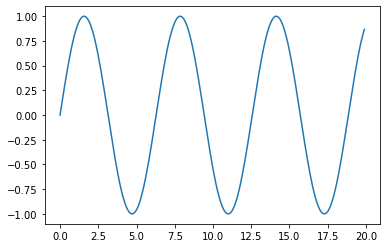

In [33]:
x = plt.arange(0,20, 0.1)
y = plt.sin(x)
plt.plot(x,y)

## Classification IRIS

In [ ]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.30)



## K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


plt.imshow(confusion_matrix(y_test, y_pred))

plt.colorbar()
plt.show()
print(classification_report(y_test, y_pred))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


## Support Vector Machine

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6) 

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, \
           linewidth=1, facecolors='none', edgecolors='k') 
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "rgb"
# plot_step = 0.02
plot_step = 0.02


# Load data
iris = datasets.load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(21, 15))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

## Pipe line

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.20)



# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
estimators.append(('clf', SVC(random_state=10)) )
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

## Hyper parameter setting: GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.20)


pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=10))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [ {'clf__C': param_range, 'clf__kernel': ['linear']}, \
              {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy',\
                  cv=10, n_jobs=1) 
gs = gs.fit(X_train, y_train)
print(gs.best_score_) 
print(gs.best_params_)

c=gs.best_estimator_ 


## Linear regression

In [ ]:
## regression

dataset = [[1, 1], [2, 2.3], [4, 3.7], [3, 3.1], [5, 5.1]]

x = [] ; y=[]
for i in range(len(dataset)):
    x.append(dataset[i][0])
    y.append(dataset[i][1])
    
A = np.vstack([x, np.ones(len(x))]).T
# simple linear regression 
nw1, nw0 = np.linalg.lstsq(A, y, rcond=None)[0]
print ('coefficients:', 'bias=',np.round(nw0, decimals=3),'   slop:=', np.round(nw1, decimals=3))


plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, nw1*np.asarray(x)+ nw0, 'r', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
def func(x): 
    return np.sin(2*np.pi*x)



# Generate sinusoidal data with noise
size = 25

x_data = np.random.uniform(0., 1., size)
y_data = func(x_data) + np.random.normal(loc=0., scale=0.2, size=size)

x_trial = np.linspace(0., 1., 100)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1,2,1)
plt.scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
plt.plot(x_trial,func(x_trial),'--', label="ground truth" )
plt.legend(loc='best')
plt.show()

    



In [ ]:
from sklearn.linear_model import BayesianRidge

## Model 1: y = w0 + w1 x 
n_order = 1
X1_data = np.vander(x_data, n_order + 1, increasing=True)
X1_trial = np.vander(x_trial, n_order + 1, increasing=True)

## Model 2: y = w0 + w1 x + w2 x^2
n_order = 2
X2_data = np.vander(x_data, n_order + 1, increasing=True)
X2_trial = np.vander(x_trial, n_order + 1, increasing=True)

## Model 3 : y = w0 + w1 x + w2 x^2 + w3 x^3 
n_order = 3
X3_data = np.vander(x_data, n_order + 1, increasing=True)
X3_trial = np.vander(x_trial, n_order + 1, increasing=True)


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))


reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
# Bayesian ridge regression with different initial value pairs
init = [1 / np.var(y_data), 1.]  # Default values

reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(X1_data, y_data)

ymean, ystd = reg.predict(X1_trial, return_std=True)

axes[0].scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
axes[0].plot(x_trial, func(x_trial), color="blue", label="sin($2\\pi x$)")
axes[0].plot(x_trial, ymean, color="red", label="predict mean")
axes[0].fill_between(x_trial, ymean-ystd, ymean+ystd, color="pink", alpha=0.5, label="predict std")
axes[0].legend()
text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format( reg.alpha_, reg.lambda_, reg.scores_[-1])
axes[0].text(0.05, -1.0, text, fontsize=12)
axes[0].set_title('1st Model', fontsize=17)

init = [1, 0.001]
reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(X2_data, y_data)
ymean, ystd = reg.predict(X2_trial, return_std=True)

axes[1].scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
axes[1].plot(x_trial, func(x_trial), color="blue", label="sin($2\\pi x$)")
axes[1].plot(x_trial, ymean, color="red", label="predict mean")
axes[1].fill_between(x_trial, ymean-ystd, ymean+ystd, color="pink", alpha=0.5, label="predict std")
axes[1].legend()
text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format( reg.alpha_, reg.lambda_, reg.scores_[-1])
axes[1].text(0.05, -1.0, text, fontsize=12)
axes[1].set_title('2nd Model', fontsize=17)


init = [0.5, 0.001]
reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(X3_data, y_data)                                        
ymean, ystd = reg.predict(X3_trial, return_std=True)            

axes[2].scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
axes[2].plot(x_trial, func(x_trial), color="blue", label="sin($2\\pi x$)")
axes[2].plot(x_trial, ymean, color="red", label="predict mean")
axes[2].fill_between(x_trial, ymean-ystd, ymean+ystd, color="pink", alpha=0.5, label="predict std")
axes[2].legend()
text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format( reg.alpha_, reg.lambda_, reg.scores_[-1])
axes[2].text(0.05, -1.0, text, fontsize=12)
axes[2].set_title('3rd Model', fontsize=17)



plt.show()



